In [2]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('.')) #for current preprocessing
# %load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v03_1 as pad


os.chdir(pad.working_dir())

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
indexers = ['Semana', 'Agencia_ID', 'Canal_ID',
            'Ruta_SAK', 'Cliente_ID', 'Producto_ID']
town = pad.text_encoding(pad.town_preproc())
data_test = pd.read_csv(pad.working_dir() + 'test.csv', index_col=0)
states = list(town.State.unique()[5:9])

state_files = ['Predictions/release_v03/Prediction_%s_v03.csv' % state for state in states]
test_states = pd.concat([pd.read_csv(f) for f in state_files])
test_data = pd.merge(data_test, test_states.set_index(indexers), 'inner',
                     left_on=indexers, right_index=True)

test_data['Demanda_uni_equil'] = test_data.Log_Demanda.apply(np.expm1)
test_data.index.name = 'id'
test_data.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Log_Demanda,Demanda_uni_equil
id,,,,,,,,
12,11,1239,1,1125,290608,4270,1.101165,2.007669
45,11,2018,1,1224,4257075,1238,0.733335,1.082012
68,11,2018,1,2858,4449604,43316,1.079232,1.942420
76,11,1239,1,1229,221935,31423,0.972214,1.643792
84,10,1245,1,1011,268238,1129,0.822677,1.276587


In [12]:
pred01 = pd.read_csv('Predictions/release_v01/Prediction_v01.csv',index_col=0)
pred01.head()

,Demanda_uni_equil
id,
0,4.000000
1,2.000000
2,2.000000
3,1.000000
4,7.987637


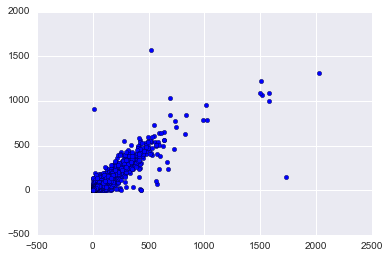

In [13]:
scatter(pred01.Demanda_uni_equil.loc[test_data.index], test_data.Demanda_uni_equil)

In [14]:
pred03 = pred01.copy()
pred03.loc[test_data.index, 'Demanda_uni_equil'] = test_data.Demanda_uni_equil
pred03.describe()

,Demanda_uni_equil
count,6.999251e+06
mean,7.041021e+00
std,1.955065e+01
min,-5.580919e-01
25%,2.000000e+00
50%,3.438995e+00
75%,6.651725e+00
max,3.860781e+03


In [15]:
pred03.loc[pred03['Demanda_uni_equil'] < 0, 'Demanda_uni_equil'] = 0

In [17]:
pred03.to_csv('Predictions/release_v03/Prediction_v01_with_altered_states.csv', float_format='%.5f')

In [19]:
0.00390 / (test_data.shape[0] / pred03.shape[0])

0.05661908267270668